In [1]:
import json
import math
import random
from pathlib import Path
from pprint import pprint
from utils import load_dataset, create_dataset, in_context_from_samples, test_prompt_from_samples, gpt_prediction, eval_response, results_path

In [2]:
output_dir = results_path / "sentence_caps_random_context_multiple"
if not output_dir.exists():
    output_dir.mkdir(parents=True)
dataset, tag_counts = load_dataset("sentences.json")
print(len(dataset))
pprint(tag_counts)

200
{'all_lower': 67,
 'all_upper': 59,
 'city': 25,
 'even_words': 97,
 'fragment_subject': 20,
 'fragment_verb': 20,
 'gpt4': 200,
 'nature': 62,
 'odd_words': 103,
 'proper_noun': 32,
 'sentence': 160,
 'shared_sample': 42,
 'start_cap': 133,
 'start_lower': 67,
 'start_the': 57}


In [3]:
# datasets: all upper vs lower; starts with a capital vs not; has a capital vs not
# even vs odd counts; even vs odd length w/ all upper vs lower-->even mixed, odd mixed
# fragments vs sentence; just subject/verb fragments vs all
# nature vs rest
# contains a proper noun
tags_true = ["all_upper"]
tags_false = ["all_lower"]
tags_common = ["sentence"]
positives, negatives = create_dataset(dataset, tags_true, tags_false, tags_common)

In [4]:
pprint(positives)

[{'input': 'THE EAGLE SOARS HIGH IN THE SKY.',
  'label': True,
  'tags': ['start_the',
           'start_cap',
           'all_upper',
           'sentence',
           'nature',
           'odd_words',
           'gpt4']},
 {'input': 'LOVE CONQUERS ALL.',
  'label': True,
  'tags': ['start_cap', 'all_upper', 'sentence', 'odd_words', 'gpt4']},
 {'input': 'THE UNIVERSE IS VAST AND MYSTERIOUS.',
  'label': True,
  'tags': ['start_the',
           'start_cap',
           'all_upper',
           'sentence',
           'nature',
           'even_words',
           'gpt4']},
 {'input': 'FAMILY HOLDS A SPECIAL PLACE IN OUR HEARTS.',
  'label': True,
  'tags': ['start_cap', 'all_upper', 'sentence', 'even_words', 'gpt4']},
 {'input': 'FAILURE IS A STEPPING STONE TO SUCCESS.',
  'label': True,
  'tags': ['start_cap', 'all_upper', 'sentence', 'odd_words', 'gpt4']},
 {'input': 'IN THE END, WE WILL REMEMBER NOT THE WORDS OF OUR ENEMIES, BUT THE '
           'SILENCE OF OUR FRIENDS.',
  'label': Tr

In [5]:
pprint(negatives)

[{'input': 'the ocean waves crash against the shore.',
  'label': False,
  'tags': ['shared_sample',
           'sentence',
           'nature',
           'odd_words',
           'start_the',
           'all_lower',
           'start_lower',
           'gpt4']},
 {'input': 'winter brings snow and frosty mornings.',
  'label': False,
  'tags': ['all_lower',
           'shared_sample',
           'sentence',
           'nature',
           'even_words',
           'start_lower',
           'gpt4']},
 {'input': 'the sun sets in the west.',
  'label': False,
  'tags': ['shared_sample',
           'sentence',
           'nature',
           'even_words',
           'start_the',
           'all_lower',
           'start_lower',
           'gpt4']},
 {'input': 'butterflies dance in the garden.',
  'label': False,
  'tags': ['all_lower',
           'sentence',
           'nature',
           'odd_words',
           'start_lower',
           'gpt4']},
 {'input': 'healthy habits lead to a happy

In [10]:
samples_per_label = 5

# positives = sorted(positives, key=lambda x: x["input"])
# negatives = sorted(negatives, key=lambda x: x["input"])
in_context_samples = positives[:samples_per_label] + negatives[:samples_per_label]
in_context_prompt = in_context_from_samples(in_context_samples)
with open(output_dir / "in_context_prompt.txt", "w") as f:
    f.write(in_context_prompt)

test_positives = positives[samples_per_label:]
test_negatives = negatives[samples_per_label:]
test_prompt, test_samples = test_prompt_from_samples(test_positives, test_negatives)
with open(output_dir / "test_prompt.txt", "w") as f:
    f.write(test_prompt)
json.dump(test_samples, open(output_dir / "test_samples.json", "w"), indent=2)

In [9]:
# temperatures = [0.1, 0.5, 1, 1.25, 1.5, 2]
temperatures = [2]
response_jsons = []
in_context_prompt = open(output_dir / "in_context_prompt.txt").read()
test_prompt = open(output_dir / "test_prompt.txt").read()
test_samples = json.load(open(output_dir / "test_samples.json"))
for t in temperatures:
    response_json = gpt_prediction(in_context_prompt, test_prompt, temperature=t, json_mode=True)
    json.dump(response_json, open(output_dir / f"response_{t}.json", "w"))
    response_jsons.append(response_json)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [11]:
temperatures = [0.1, 0.5, 1, 1.25, 1.5]
response_jsons = [json.load(open(output_dir / f"response_{t}.json")) for t in temperatures]
test_samples = json.load(open(output_dir / "test_samples.json"))

results = []
responses = []
for r in response_jsons:
    print(r)
    response, result = eval_response(r, test_samples)
    results.append(result)
    responses.append(response)

[{'input': 'FRIENDSHIP IS LIKE A SHINING STAR IN THE DARK.', 'label': True}, {'input': 'the river flows silently through the valley.', 'label': False}, {'input': 'READING OPENS DOORS TO NEW WORLDS.', 'label': True}, {'input': 'summer evenings are filled with laughter.', 'label': False}, {'input': 'the moonlight casts a glow over the night.', 'label': False}, {'input': 'BE KIND TO ONE ANOTHER.', 'label': True}, {'input': 'laughter is contagious and brings joy.', 'label': False}, {'input': 'science and technology are driving innovation.', 'label': False}, {'input': 'LEARNING IS A LIFELONG JOURNEY.', 'label': True}, {'input': 'CURIOSITY LEADS TO DISCOVERY.', 'label': True}, {'input': 'sunflowers turn to face the sun.', 'label': False}, {'input': 'writing allows thoughts to come to life.', 'label': False}, {'input': 'GRATITUDE OPENS DOORS TO ABUNDANCE.', 'label': True}, {'input': 'music has the power to evoke strong emotions.', 'label': False}, {'input': 'ALWAYS STRIVE FOR EXCELLENCE.', 'l

In [12]:
for t, r in zip(temperatures, results):
    r["temp"] = t
pprint(results)

[{'accuracy': 0.0,
  'correct': 0,
  'corrupted': 0,
  'incorrect': 0,
  'mismatch': 90,
  'temp': 0.1,
  'total': 90},
 {'accuracy': 0.0,
  'correct': 0,
  'corrupted': 0,
  'incorrect': 0,
  'mismatch': 90,
  'temp': 0.5,
  'total': 90},
 {'accuracy': 0.0,
  'correct': 0,
  'corrupted': 0,
  'incorrect': 0,
  'mismatch': 90,
  'temp': 1,
  'total': 90},
 {'accuracy': 0.0,
  'correct': 0,
  'corrupted': 0,
  'incorrect': 0,
  'mismatch': 90,
  'temp': 1.25,
  'total': 90},
 {'accuracy': 0.0,
  'correct': 0,
  'corrupted': 0,
  'incorrect': 0,
  'mismatch': 90,
  'temp': 1.5,
  'total': 90}]


In [13]:
if not output_dir.exists():
    output_dir.mkdir()
json.dump(responses, open(output_dir / "responses.json", "w"))
json.dump(results, open(output_dir / "results.json", "w"))

      correct  mismatch  incorrect  corrupted
temp                                         
0.10      0.0       1.0        0.0        0.0
0.50      0.0       1.0        0.0        0.0
1.00      0.0       1.0        0.0        0.0
1.25      0.0       1.0        0.0        0.0
1.50      0.0       1.0        0.0        0.0


Text(0.5, 1.0, '"ALL CAPS" vs "all lower" unpaired context (n=90, pos=45, neg=45)')

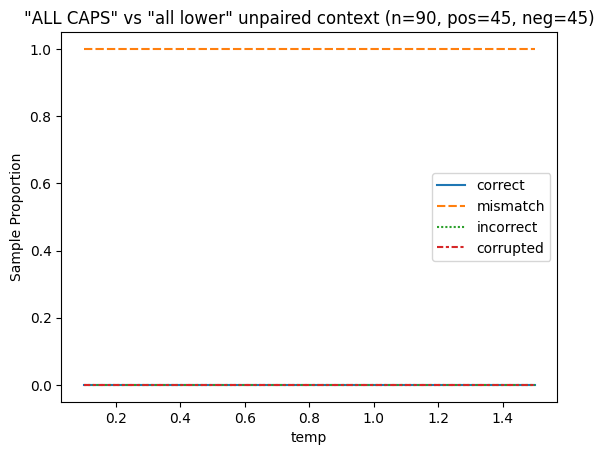

In [14]:
import pandas as pd
import seaborn as sns

results = json.load(open(output_dir / "results.json"))

test_samples = json.load(open(output_dir / "test_samples.json"))
total_samples = len(test_samples)
pos_samples = len([s for s in test_samples if s["label"]])
neg_samples = total_samples - pos_samples

df = pd.DataFrame(results)
df.drop(columns=["accuracy"], inplace=True)

for col in df.columns:
    df[col] /= df["total"]
df.drop(columns=["total"], inplace=True)
df.set_index("temp", inplace=True)
print(df)

ax = sns.lineplot(data=df)
ax.set_ylabel("Sample Proportion")
ax.set_title(f"\"ALL CAPS\" vs \"all lower\" unpaired context (n={total_samples}, pos={pos_samples}, neg={neg_samples})")